In [223]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [224]:
data = pd.read_csv('HistoricalData_TSLA.csv')

In [225]:
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,04/06/2022,$1045.76,29782850,$1073.47,$1079,$1027.7
1,04/05/2022,$1091.26,26691670,$1136.3,$1152.87,$1087.3
2,04/04/2022,$1145.45,27392570,$1089.38,$1149.91,$1072.53
3,04/01/2022,$1084.59,18087740,$1081.15,$1094.75,$1066.64
4,03/31/2022,$1077.6,16330920,$1094.57,$1103.1399,$1076.641


In [226]:
data.columns = map(str.lower, data.columns)
data['close'] = data['close/last'].str.replace('$','') 
data['open'] = data['open'].str.replace('$','')
data['high'] = data['high'].str.replace('$','')
data['low'] = data['low'].str.replace('$','')
data['open'] = data['open'].astype(float)
data['high'] = data['high'].astype(float)
data['low'] = data['low'].astype(float)
data['close'] = data['close'].astype(float)

In [227]:
data.describe()

,volume,open,high,low,close
count,1.259000e+03,1259.000000,1259.000000,1259.000000,1259.000000
mean,4.462018e+07,297.169078,304.189953,289.999471,297.327486
std,3.009540e+07,332.604220,340.671594,324.275241,332.654399
min,9.800558e+06,36.220000,37.336000,35.398400,35.794000
25%,2.517568e+07,61.681000,62.792000,60.573000,61.751000
50%,3.481203e+07,72.000000,73.140000,70.550000,71.634000
75%,5.194764e+07,606.114850,622.280000,595.655000,608.165000
max,3.046938e+08,1234.410000,1243.490000,1217.000000,1229.910000


In [228]:
data['open'] = data['open'].astype(float)
data['high'] = data['high'].astype(float)
data['low'] = data['low'].astype(float)
data['close'] = data['close'].astype(float)

In [229]:
data.columns = map(str.lower, data.columns)


In [230]:
data['date'] = pd.to_datetime(data['date'])
data_testing = data[data['date'] > '2021-10-06']
data =  data[data['date'] < '2022-01-01']


In [210]:
u = data.sort_values('date')


In [231]:
len(data_testing)


126

In [232]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data[['close','volume','high']].values.reshape(-1,3))
new_scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_temp = new_scaler.fit_transform(data['close'].values.reshape(-1,1))
scaled_data_test = scaler.fit_transform(data_testing[['close','volume','high']].values.reshape(-1,3))

In [248]:
prediction_days = 60

y_train_new = []

for x in range(prediction_days, len(scaled_data)):
    y_train_new.append(scaled_data_temp[x,:])

In [247]:
len(scaled_data)

1193

In [249]:
prediction_days = 60
x_train = []


for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days:x,: ])
   

In [250]:
prediction_days = 60

x_test = []


for x in range(prediction_days, len(scaled_data_test)):
    x_test.append(scaled_data_test[x - prediction_days:x,: ])

In [251]:
len(y_train_new)

1133

In [252]:
x_train1, y_train_new1, x_test = np.array(x_train), np.array(y_train_new) , np.array(x_test)

In [253]:
x_train1 = np.reshape(x_train1, (x_train1.shape[0], x_train1.shape[1],3))

In [254]:
def LSTM_model():
    
    model = Sequential()
    
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train1.shape[1],3)))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1))
    
    return model

In [255]:
model1 = LSTM_model()
model1.summary()
model1.compile(optimizer='adam', 
              loss='mean_squared_error')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 60, 50)            10800     
                                                                 
 dropout_21 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_22 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_22 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_23 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_23 (Dropout)        (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [244]:
len(y_train_new1)

1103

In [256]:
model1.fit(x_train1, 
          y_train_new1, 
          epochs=25, 
          batch_size = 32)

Epoch 1/25
36/36 [==============================] - 13s 88ms/step - loss: 0.0095
Epoch 2/25
36/36 [==============================] - 3s 87ms/step - loss: 0.0018
Epoch 3/25
36/36 [==============================] - 4s 102ms/step - loss: 0.0016
Epoch 4/25
36/36 [==============================] - 3s 97ms/step - loss: 0.0015
Epoch 5/25
36/36 [==============================] - 4s 100ms/step - loss: 0.0015
Epoch 6/25
36/36 [==============================] - 3s 88ms/step - loss: 0.0012
Epoch 7/25
36/36 [==============================] - 3s 96ms/step - loss: 0.0013
Epoch 8/25
36/36 [==============================] - 4s 98ms/step - loss: 0.0013
Epoch 9/25
36/36 [==============================] - 4s 98ms/step - loss: 0.0012
Epoch 10/25
36/36 [==============================] - 4s 102ms/step - loss: 0.0014
Epoch 11/25
36/36 [==============================] - 3s 82ms/step - loss: 0.0011
Epoch 12/25
36/36 [==============================] - 4s 98ms/step - loss: 0.0011
Epoch 13/25
36/36 [==============

In [257]:
data_testing_actual = data_testing[data_testing['date'] > '2021-12-31']

In [258]:
data_testing_actual = data_testing_actual['close']

In [259]:
data_testing_actual = data_testing_actual.values

In [260]:
x_test.shape

(66, 60, 3)

In [264]:
data_testing_actual.shape

(66,)

In [261]:
predicted_prices = model1.predict(x_test)
predicted_prices = new_scaler.inverse_transform(predicted_prices)

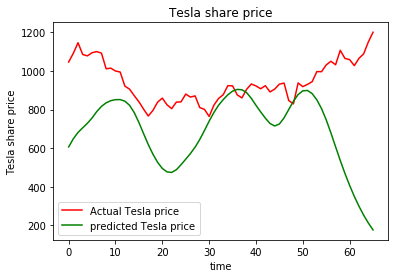

In [262]:
company= 'Tesla'
plt.plot(data_testing_actual, color='red', label=f"Actual {company} price")
plt.plot(predicted_prices, color= 'green', label=f"predicted {company} price")
plt.title(f"{company} share price")
plt.xlabel("time")
plt.ylabel(f"{company} share price")
plt.legend()
plt.show()

In [263]:
rmse = np.sqrt(np.mean(((predicted_prices - data_testing_actual) ** 2)))
rmse

328.83788600647773

In [267]:
from sklearn.metrics import r2_score
r2_score(data_testing_actual,predicted_prices)

-9.363687471852675

In [266]:
len(data_testing_actual)

66